second attempt at project

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Housing.csv')
print(dataset.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [50]:
print(dataset.shape)

(545, 13)


In [51]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [52]:
print(dataset.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


encoding yes/no to 1/0

In [53]:
encode_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea" ]  

dataset[encode_columns] = dataset[encode_columns].replace({'yes': 1, 'no':0})

C:\Users\Akanksha Kashyap\AppData\Local\Temp\ipykernel_32112\3135261894.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[encode_columns] = dataset[encode_columns].replace({'yes': 1, 'no':0})


In [54]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


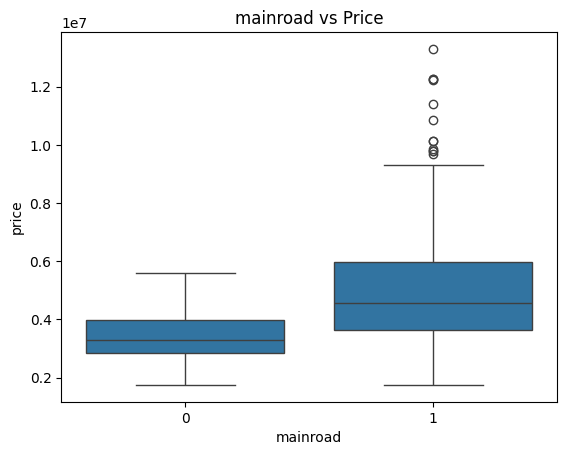

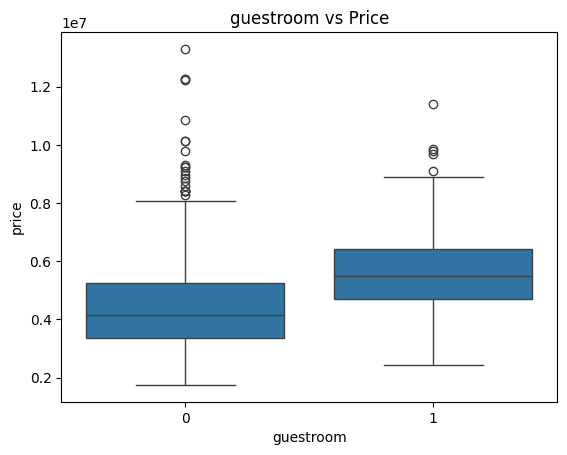

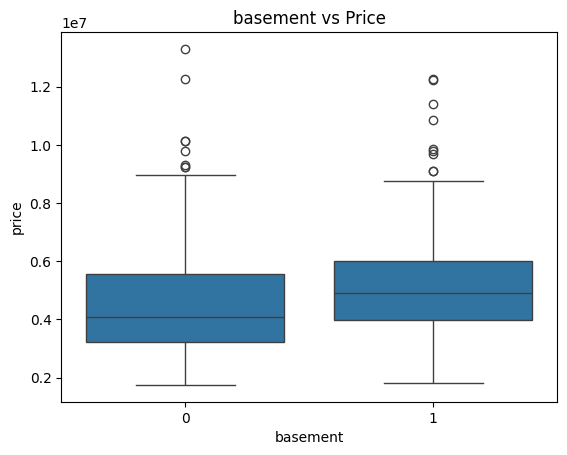

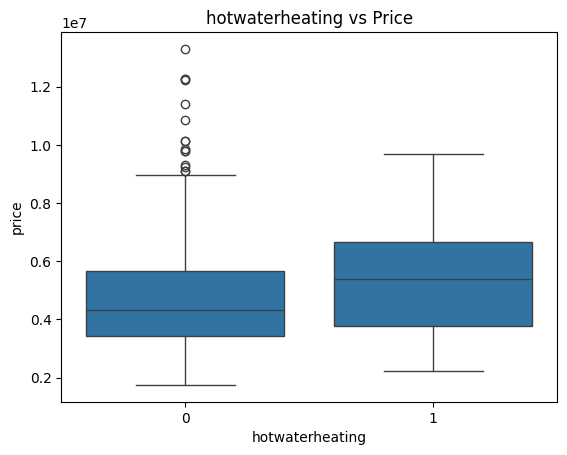

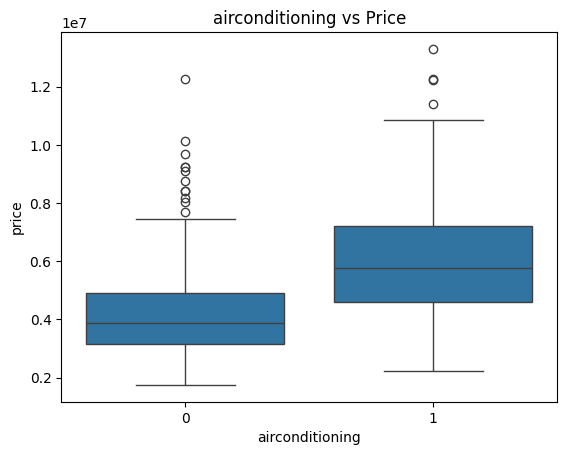

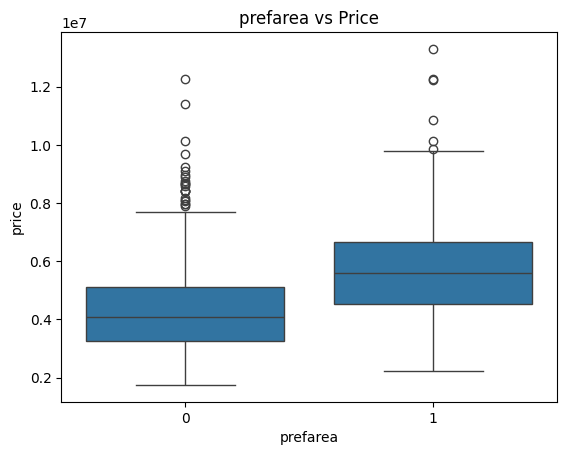

In [55]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

for col in binary_cols:
    sns.boxplot(x=col, y='price', data=dataset)
    plt.title(f"{col} vs Price")
    plt.show()

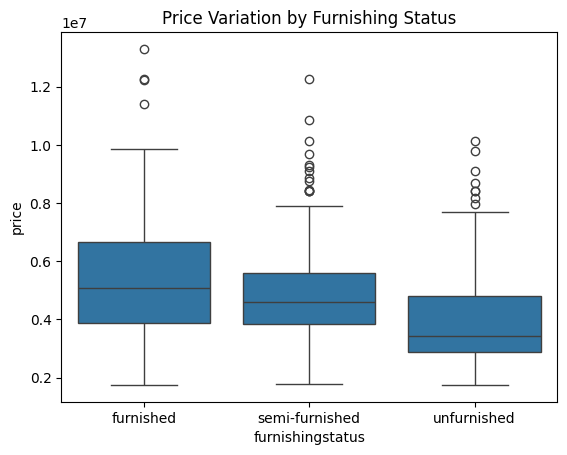

In [56]:
sns.boxplot(x='furnishingstatus', y='price', data=dataset)
plt.title('Price Variation by Furnishing Status')
plt.show()

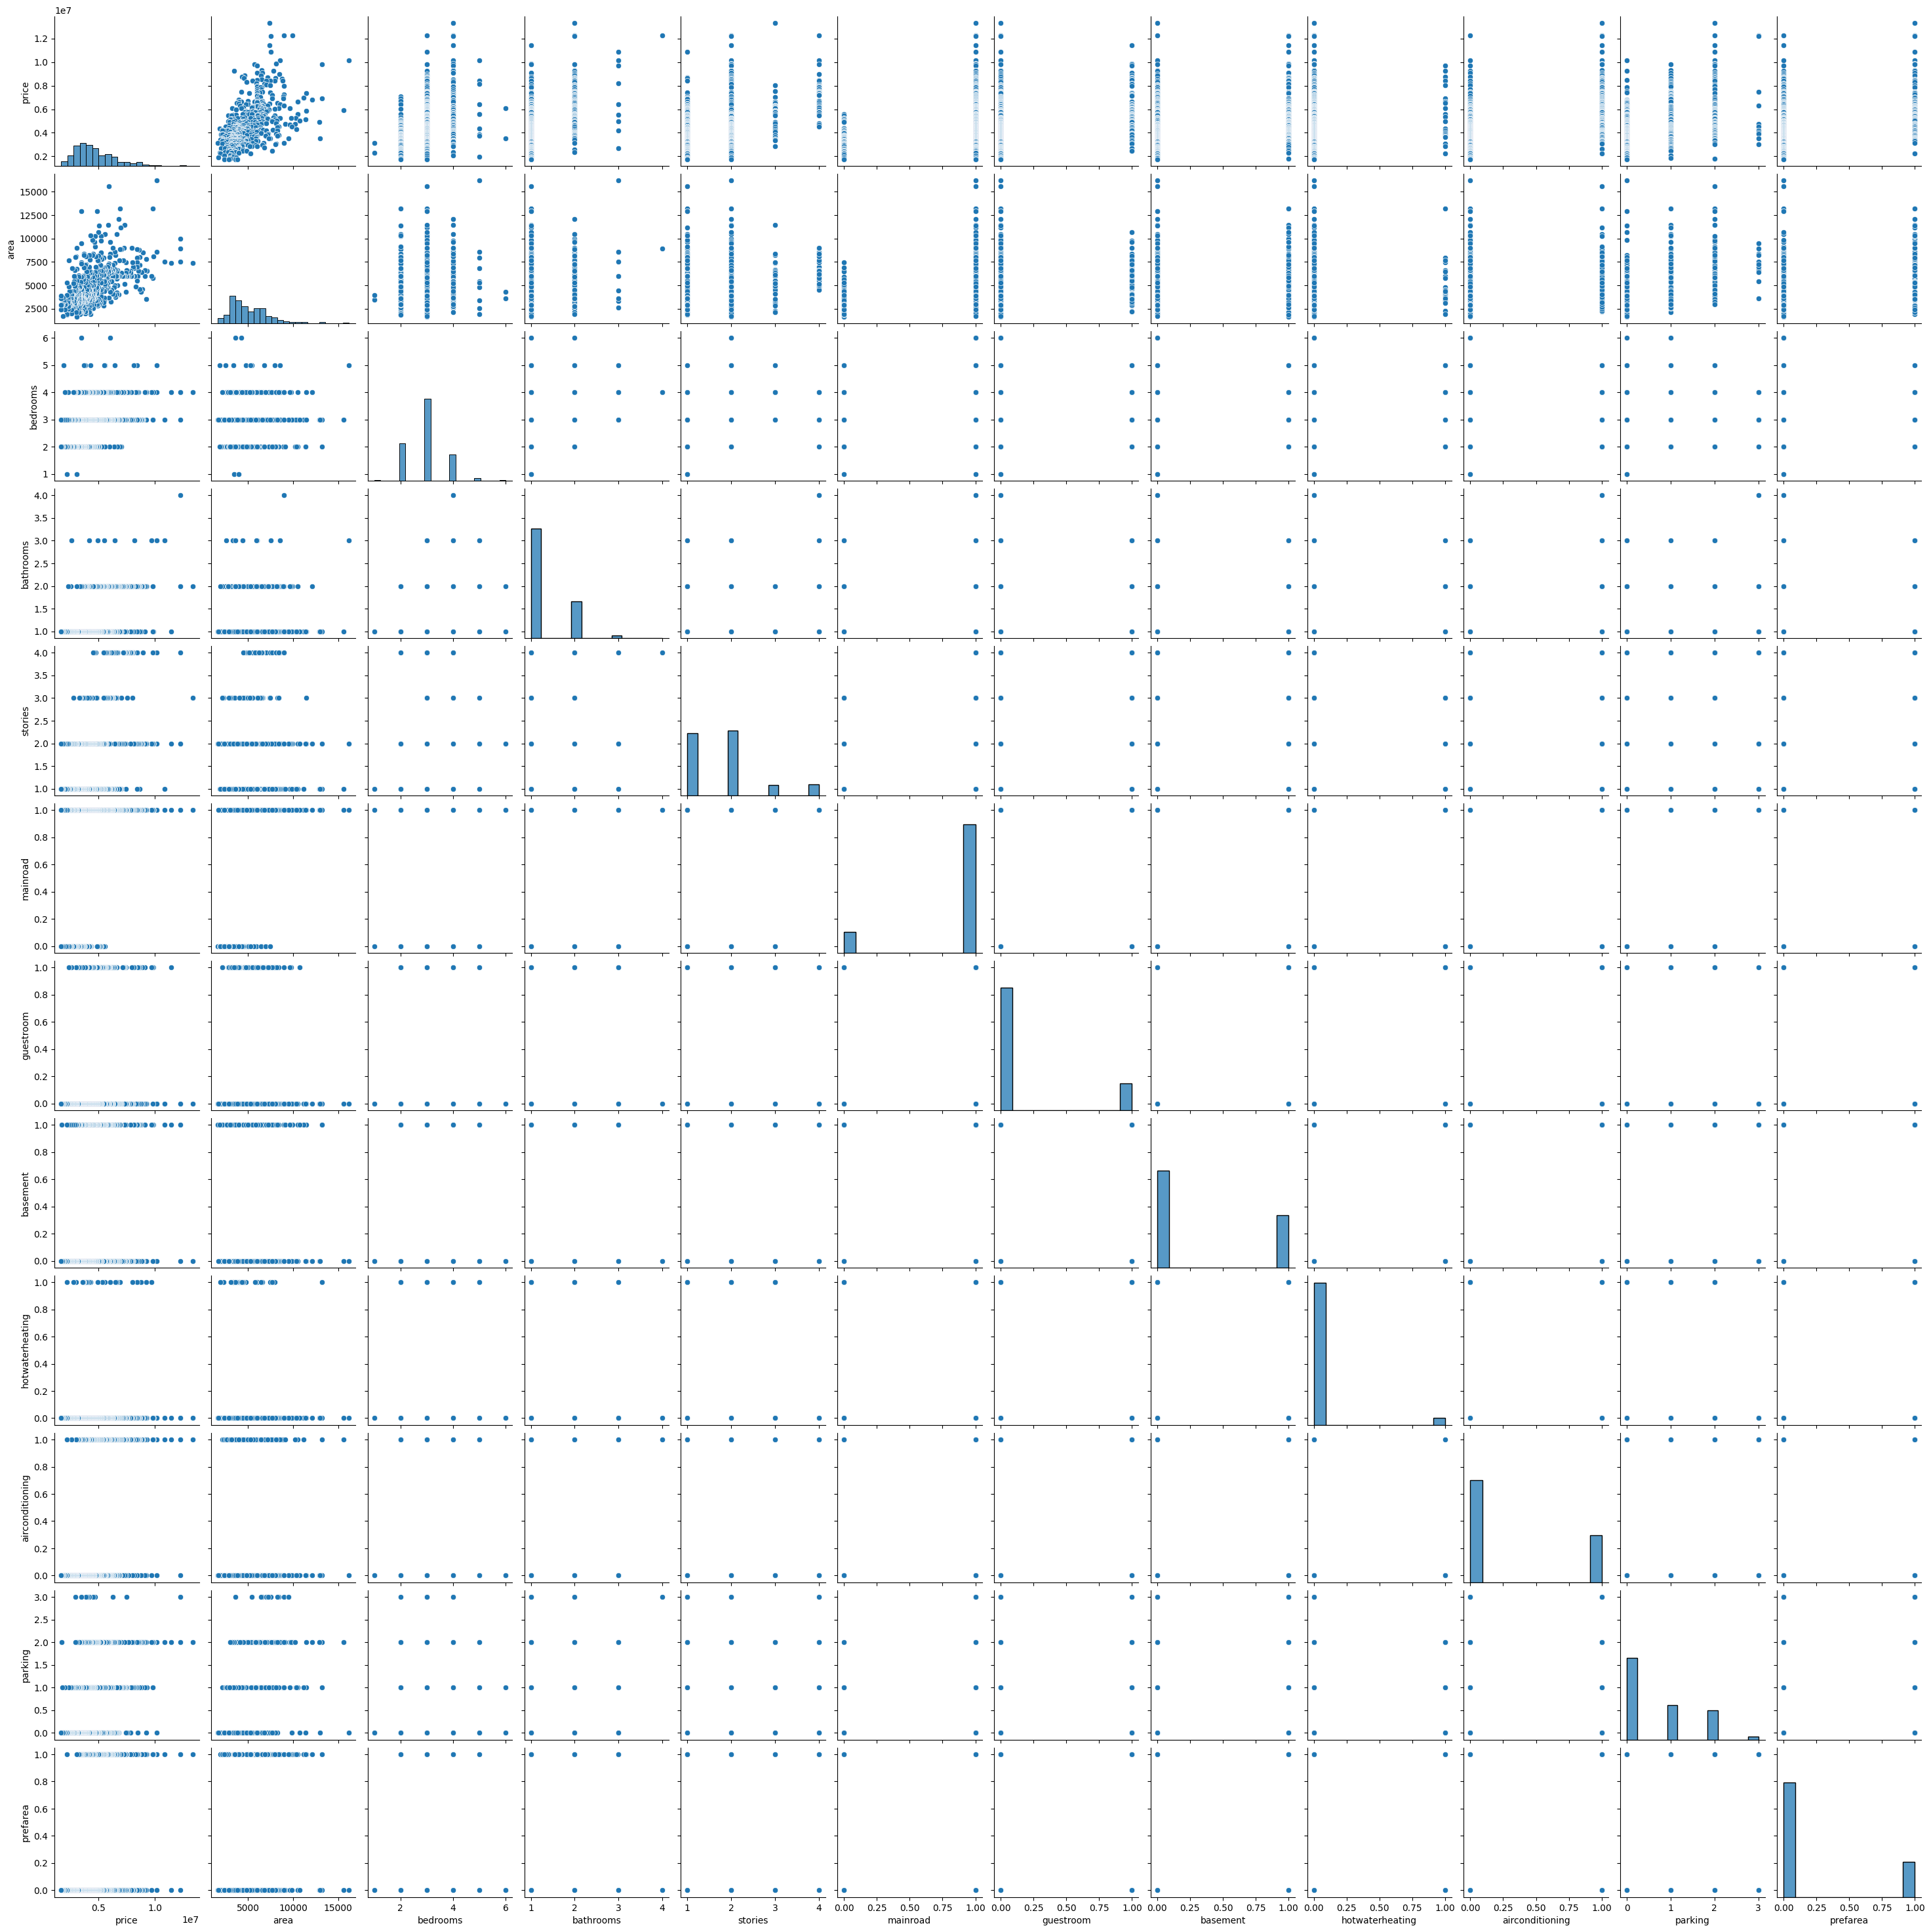

In [57]:
sns.pairplot(dataset)
plt.show()

one-hot encoding for unfurnished, sei-furnished and furnished columns

In [58]:
# creating three columns for the three categories of the 'furnishingstatus' column

dataset['is_furnished'] = 0
dataset['is_semi-furnished'] = 0
dataset['is_unfurnished'] = 0

dataset.loc[dataset['furnishingstatus'] == 'furnished', 'is_furnished'] = 1


# trying with if logic but maintaining vecortization and speed as a professional, rather than the classic time consuming if-else loop 
import numpy as np 

# logic: np.where(condition, value_if_true, value_if_false) 
dataset['is_semi-furnished'] = np.where(dataset['furnishingstatus'] == 'semi-furnished', 1, 0) 

dataset['is_unfurnished'] = np.where(dataset['furnishingstatus'] == 'unfurnished', 1 , 0) 

# now dropping the unfurnished and original furnishining status column 
dataset.drop(['furnishingstatus', 'is_unfurnished'], axis=1, inplace=True)

In [59]:
dataset.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,is_furnished,is_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,0


EDA

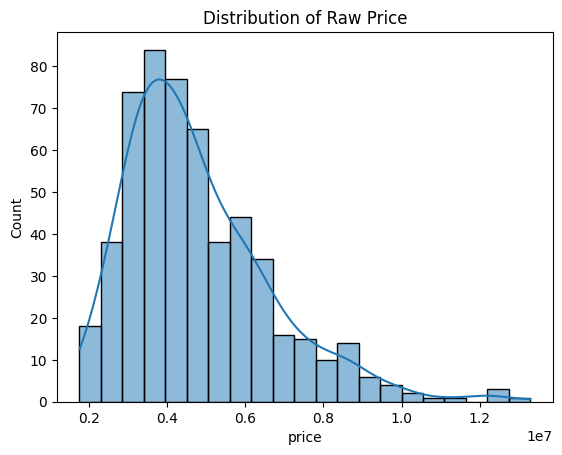

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['price'], kde=True)
plt.title('Distribution of Raw Price')
plt.show()

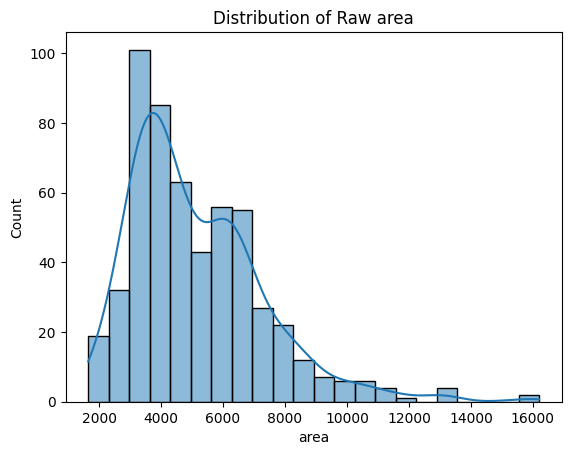

In [61]:


sns.histplot(dataset['area'], kde=True)
plt.title('Distribution of Raw area')
plt.show()

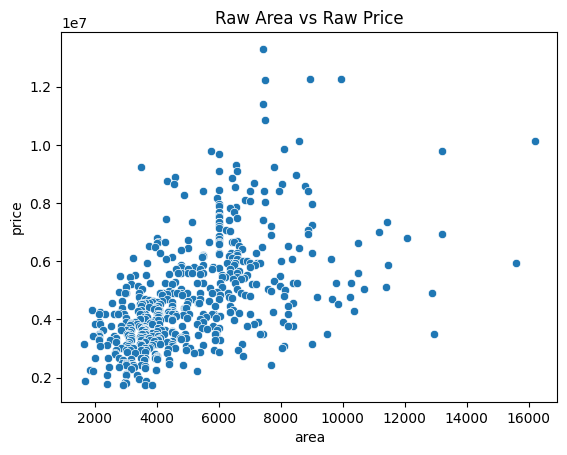

In [62]:
sns.scatterplot(x='area', y='price', data=dataset)
plt.title('Raw Area vs Raw Price')
plt.show()

In [63]:
# Apply Log Transformation to prie and area columns 
dataset['log_price'] = np.log(dataset['price'])
dataset['log_area'] = np.log(dataset['area'])

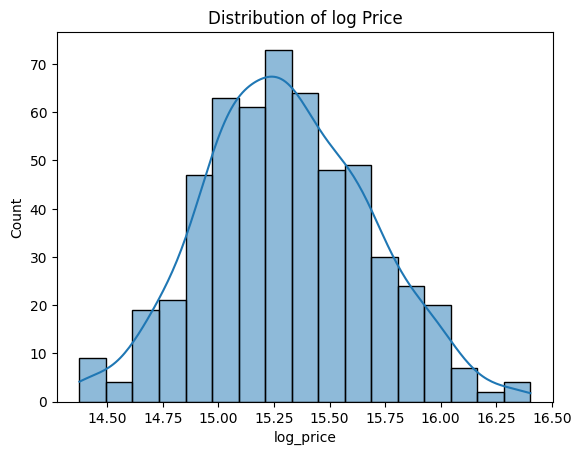

In [64]:
sns.histplot(dataset['log_price'], kde=True)
plt.title('Distribution of log Price')
plt.show()

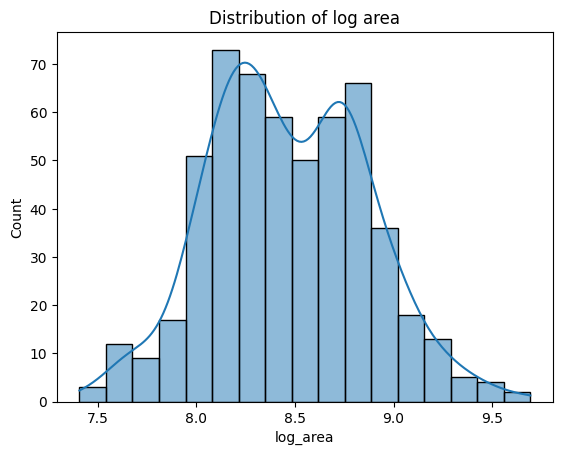

In [65]:
sns.histplot(dataset['log_area'], kde=True)
plt.title('Distribution of log area')
plt.show()

In [66]:
dataset.drop(['price', 'area'], axis=1, inplace=True)

In [67]:
dataset.head()

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,is_furnished,is_semi-furnished,log_price,log_area
0,4,2,3,1,0,0,0,1,2,1,1,0,16.403275,8.911934
1,4,4,4,1,0,0,0,1,3,0,1,0,16.321036,9.100526
2,3,2,2,1,0,1,0,0,2,1,0,1,16.321036,9.206332
3,4,2,2,1,0,1,0,1,3,1,1,0,16.318175,8.922658
4,4,1,2,1,1,1,0,1,2,0,1,0,16.250001,8.911934


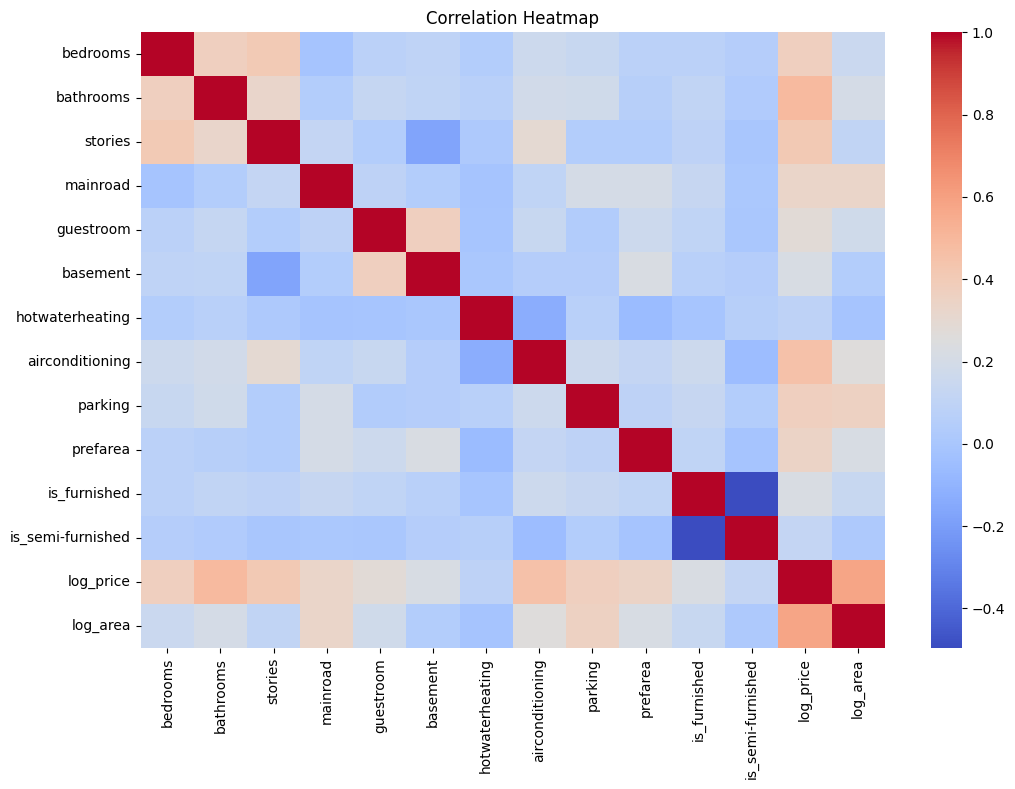

In [68]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

target and feature separation

In [69]:
# Separate Features (X) and Target (y)
X = dataset.drop('log_price', axis=1)
y = dataset['log_price']

In [ ]:
# Create an interaction between area and bathrooms

X['area_x_bathrooms'] = X['log_area'] * X['bathrooms'] 



spliting data set into test and train

In [71]:
from sklearn.model_selection import train_test_split

# Splitting the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

scaling the data

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# 1. Initialize and Train the Model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# 2. Make Predictions on the Test Set
y_pred_log = lm.predict(X_test_scaled)

# 3. Evaluate the Model (R-squared)
# This tells you what percentage of the price variation your model explains.
r2 = r2_score(y_test, y_pred_log)
print(f"R-squared Score: {r2:.4f}")

# 4. Calculate the real-world error (MAE in Dollars)
# We use np.exp() to reverse the log we did earlier
y_test_dollars = np.exp(y_test)
y_pred_dollars = np.exp(y_pred_log)

mae = mean_absolute_error(y_test_dollars, y_pred_dollars)
print(f"Average Error: ${mae:,.2f}")

R-squared Score: 0.7080
Average Error: $719,390.34


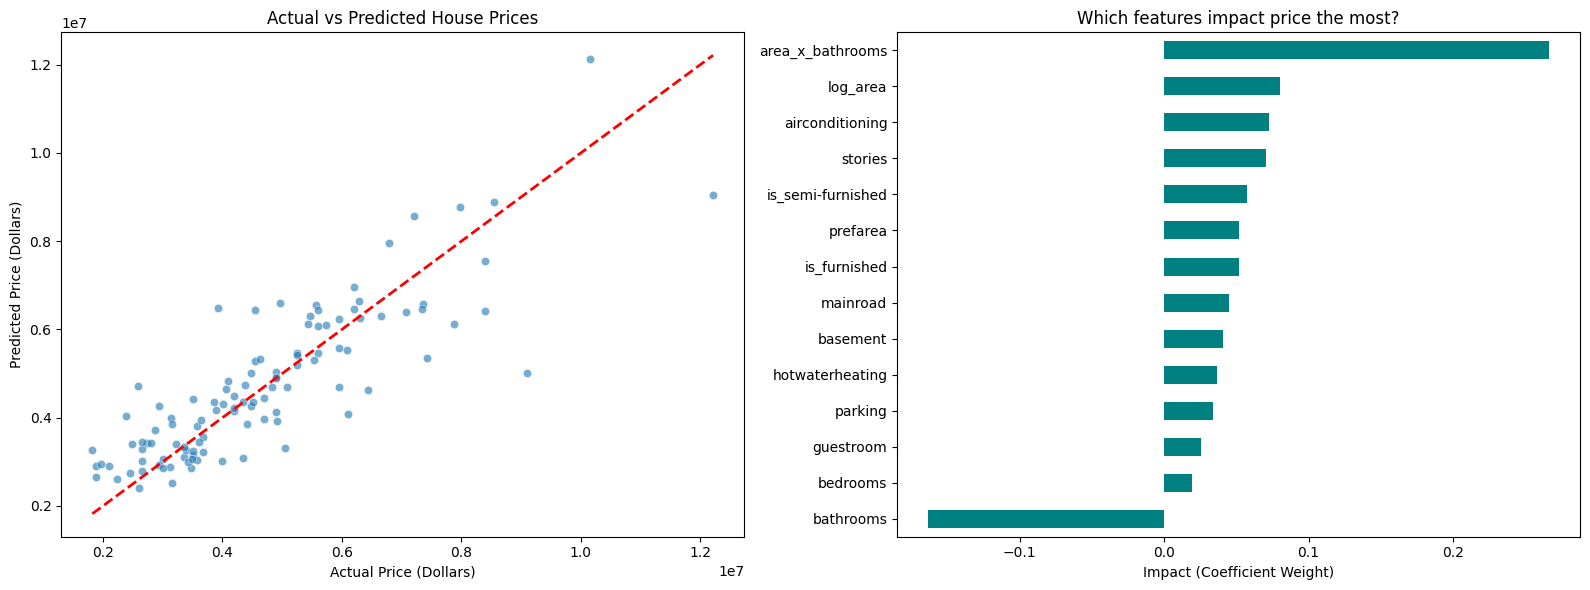

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Plot 1: Actual vs Predicted Prices (The "Cigar" Plot)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_dollars, y=y_pred_dollars, alpha=0.6)
# Adding the diagonal line for reference
plt.plot([y_test_dollars.min(), y_test_dollars.max()], [y_test_dollars.min(), y_test_dollars.max()], 'r--', lw=2)
plt.xlabel('Actual Price (Dollars)')
plt.ylabel('Predicted Price (Dollars)')
plt.title('Actual vs Predicted House Prices')

# Plot 2: Top Drivers of Price (Coefficients)
plt.subplot(1, 2, 2)
# Using 'lm' here instead of 'model'
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Weight']).sort_values(by='Weight', ascending=True)
coeff_df['Weight'].plot(kind='barh', color='teal')
plt.title('Which features impact price the most?')
plt.xlabel('Impact (Coefficient Weight)')

plt.tight_layout()
plt.show()